In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 


In [2]:
# ТЗ 
## Поле	Описание
## event_id	идентификатор урока
## event_date	дата урока
## customer_id	идентификатор ученика
## is_attend	1 — посетил, 0 — пропустил
## group_ids	идентификатор группы
## teacher_ids	идентификатор преподавателя
## attendance_id	идентификатор строки

In [3]:
t = pd.read_excel(r"C:\Users\Sasha\Downloads\Копия Аналитик — тестовое задание.xlsx")
t.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


# Проведем быстро анализ 

In [4]:
# Проверим сразу есть ли дубли
np.sum(t.duplicated())
# Отлично дублей нет 

np.int64(0)

In [5]:
t.info()
# Так ну по типам нас все устроивает

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_id       320 non-null    int64         
 1   event_date     320 non-null    datetime64[ns]
 2   customer_id    320 non-null    int64         
 3   is_attend      320 non-null    int64         
 4   group_ids      320 non-null    int64         
 5   teacher_ids    320 non-null    int64         
 6   attendance_id  320 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 17.6 KB


In [6]:
# Посмотрим сколько у нас уникальных значений по таблице
t.nunique()

event_id          62
event_date        41
customer_id       51
is_attend          2
group_ids          4
teacher_ids        5
attendance_id    320
dtype: int64

In [7]:
t = t.sort_values(by="event_date", ascending=True).reset_index(drop = True)
t.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,4,2020-05-21,37,1,3,5,4
1,3,2020-05-21,94,1,1,3,6
2,4,2020-05-21,30,1,3,5,1
3,3,2020-05-21,197,1,1,3,5
4,3,2020-05-21,12,1,1,3,8


### Посмотрим по датам сколько людей ходит на пары и сколько людей отсутствует, сделаем в процентном соотношении это

In [8]:
# Посмотрим скок людей ходило на пару по дням
lesson_attendance = t[["event_date", "is_attend"]].groupby(by="event_date")["is_attend"].agg(['sum', 'count']).reset_index()
lesson_attendance = lesson_attendance.rename(columns = {
    "event_date": "event_date",
    "sum": "appear_at_class",
    "count": "all_pupils"
})
lesson_attendance["appear_rate"] = (lesson_attendance["appear_at_class"] / lesson_attendance["all_pupils"]) * 100
lesson_attendance.head()

,event_date,appear_at_class,all_pupils,appear_rate
0,2020-05-21,8,8,100.0
1,2020-05-22,4,4,100.0
2,2020-05-23,4,4,100.0
3,2020-05-25,3,4,75.0
4,2020-05-26,4,4,100.0


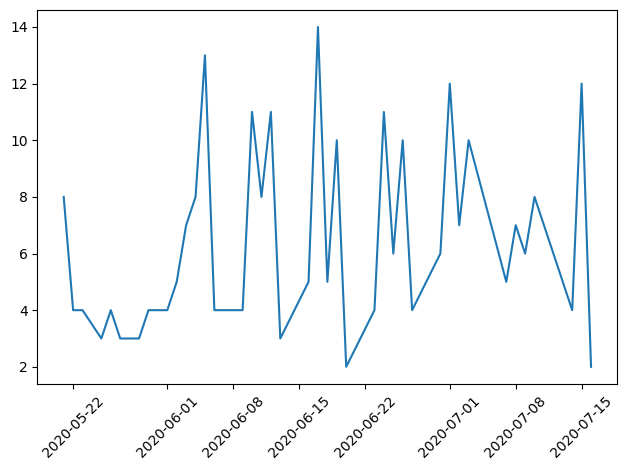

In [9]:
# Теперь изобразим эту посещаемость 
plt.plot(lesson_attendance.event_date, lesson_attendance.appear_at_class)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Теперь давайте посмотрим сколько людей находится в одной группе и также проиллюстрируем это 
cnt_group_people = t.groupby(by = "group_ids")["customer_id"].nunique().reset_index()
cnt_group_people

,group_ids,customer_id
0,1,12
1,2,10
2,3,11
3,5,19


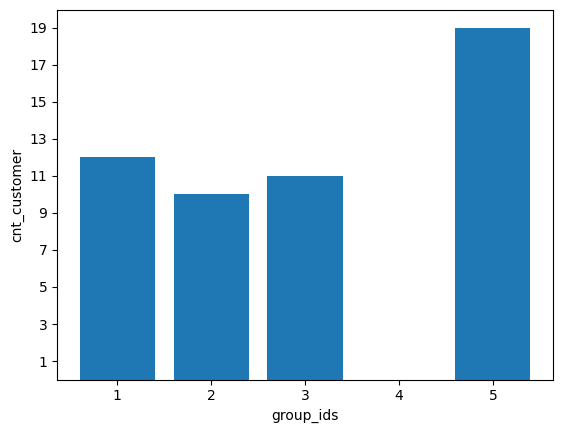

In [11]:
plt.bar(cnt_group_people.group_ids, cnt_group_people.customer_id)
plt.yticks(np.arange(1, max(cnt_group_people.customer_id) + 1, 2)) 

plt.xlabel('group_ids')
plt.ylabel('cnt_customer')

plt.show()

## Можно визуализировать это сколько учитель суммарно провел пар, давайте изобразим и это

In [12]:
cnt_lesson_teach = t.groupby(by = "teacher_ids")["event_id"].count().reset_index()
cnt_lesson_teach

,teacher_ids,event_id
0,3,68
1,4,120
2,5,70
3,6,51
4,7,11


<BarContainer object of 5 artists>

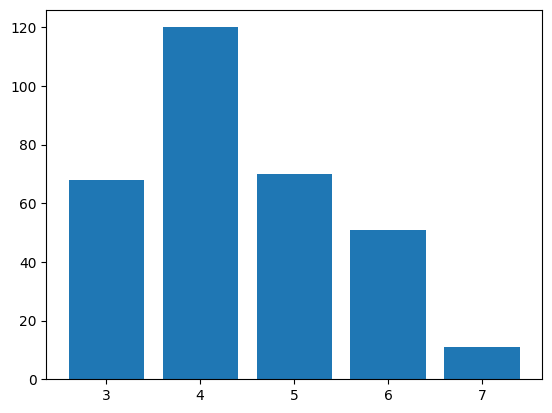

In [13]:
plt.bar(cnt_lesson_teach.teacher_ids, cnt_lesson_teach.event_id)

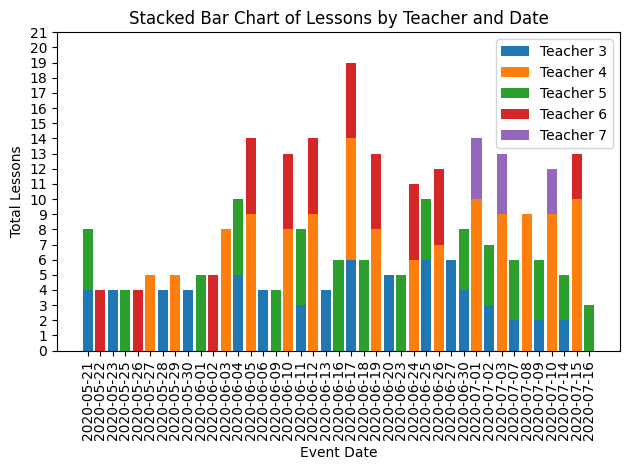

In [65]:
# Посмотрим сколько в отдельности каждый препод провел пар в день
grouped = t.groupby(['event_date', 'teacher_ids'])['event_id'].count().unstack(fill_value=0)

event_dates = grouped.index
grouped = grouped.reset_index(drop=True)

fig, ax = plt.subplots()

bottom = np.zeros(len(grouped))

for teacher_id in grouped.columns:
    ax.bar(np.arange(len(grouped)), grouped[teacher_id], label=f'Teacher {teacher_id}', bottom=bottom)
    bottom += grouped[teacher_id]

# Настраиваем график
ax.set_xlabel('Event Date')
ax.set_ylabel('Total Lessons')
ax.set_title('Stacked Bar Chart of Lessons by Teacher and Date')
ax.legend()

plt.xticks(np.arange(len(event_dates)), [date.strftime('%Y-%m-%d') for date in event_dates], rotation=90)
plt.yticks(np.arange(0, 22, 1))

plt.tight_layout()
plt.show()

In [75]:
# Посмотрим сколько в отдельности каждый студент сходил на пары
y =t.groupby(by = "customer_id")["event_id"].count().reset_index().sort_values(by = "event_id")
y.head()

,customer_id,event_id
47,654,1
6,42,2
4,36,2
7,47,2
12,135,2


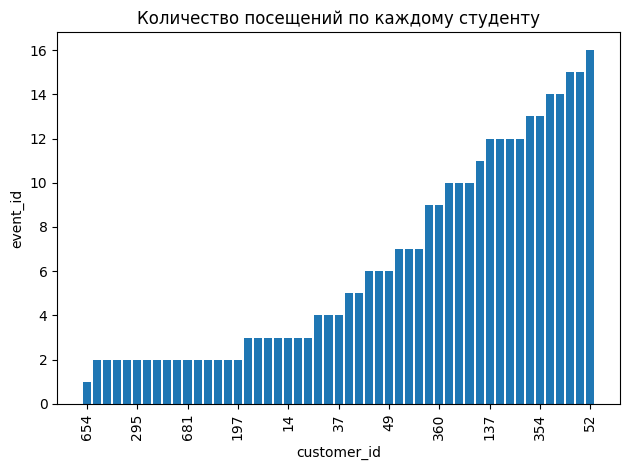

In [95]:
width = 0.8
plt.bar(np.arange(len(y)), y.event_id, width=width)
N = 5  
plt.xticks(np.arange(0, len(y), N), y.customer_id[::N], rotation=90) 
plt.xlabel("customer_id")
plt.ylabel("event_id")
plt.title("Количество посещений по каждому студенту")
plt.tight_layout()
plt.show()